# Is it worth for bank to develop recovery strategies for different levels of 'uncollectable' debts?

The expected recovery amount of debt is the money that bank still want to collect and is possible to be collected after a debt has been legally declared "uncollectable". This expected amount is a function of various factors that impact the ability and willingness to pay. Bank has classified these loans into different levels based on the amount collected. The more amounts that can be recovered, the higher the level. The bank executes different recovery strategies on different levels. Of course, the bank does more efforts on those higher level debts. But the costs of every higher level recovery strategies are 50 dollars higher than the lower one's. It is important to know if the amount that is recovered at the higher strategy level exceed the extra 50 dollars in costs? 


In [1]:
import pandas as pd 
import numpy as np

# Read in dataset
df = pd.read_csv("bank_data.csv")

df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [2]:
len(df)

1882

Check the range of all of the expected recovery amount of money:

In [46]:
print(min(df.expected_recovery_amount))
print(max(df.expected_recovery_amount))

194
9964


Check the cut-off point between levels：

In [21]:
df.loc[df['recovery_strategy']=="Level 1 Recovery"].head(1)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
247,1629,1001,1723.54922,Level 1 Recovery,35,Male


In [22]:
df.loc[df['recovery_strategy']=="Level 2 Recovery"].head(1)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
917,392,2001,2028.40659,Level 2 Recovery,22,Female


In [23]:
df.loc[df['recovery_strategy']=="Level 3 Recovery"].head(1)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
1250,621,3002,5392.977189,Level 3 Recovery,47,Male


In [24]:
df.loc[df['recovery_strategy']=="Level 4 Recovery"].head(1)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
1618,1078,5008,7192.934912,Level 4 Recovery,63,Male


As it shows above, the expected recovery amount cut-off points between every level are seperately: 1000,2000,3000,5000

Now, we want to exclude the effects from other factors such as age or sex. So it's necessary to do a statistical test to prove the different actual recovery amounts of money result from different recovery strategies, not other factors. Firstly, do a statistical test on age vs. expected recovery amount in level 1 and level 2.

No handles with labels found to put in legend.


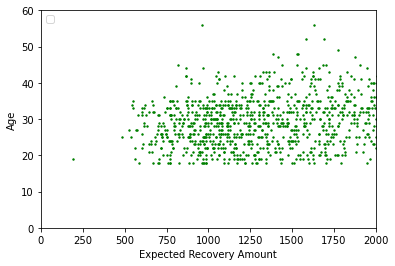

In [48]:
# In order to observe the relationship of Age and Expected Recovery Amount more directly, make a scatter plot:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(x=df['expected_recovery_amount'], y=df['age'], c="g", s=2)
plt.xlim(0, 2000)
plt.ylim(0, 60)
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.legend(loc=2)

Due to the rare sample in certain expected recovery amount level, we should choose a proper threshold that the sample amount are similar below and above 1000.

In [43]:
from scipy import stats
# Select a proper threshold including cut-off point 1000: 
thr_800_1200 = df.loc[(df['expected_recovery_amount']<1200) & 
                      (df['expected_recovery_amount']>=800)]
by_recovery_strategy = thr_800_1200.groupby(['recovery_strategy'])
by_recovery_strategy['age'].describe().unstack()
# Conduct test on the age data in two different level to oberserve whether there's an age jump around 1000:
Level_0_age = thr_800_1200.loc[df['recovery_strategy']=="Level 0 Recovery"]['age']
Level_1_age = thr_800_1200.loc[df['recovery_strategy']=="Level 1 Recovery"]['age']
stats.kruskal(Level_0_age,Level_1_age) 

KruskalResult(statistic=0.46040638243933163, pvalue=0.49743411104635116)

Good news is that there's no obvious jump between level 0 strategy and level 1 strategy in average age.

Then, We test that whether there's a difference between level 0 strategy and level 1 strategy in the proportion of male and female .

In [47]:
crosstab = pd.crosstab(df.loc[(df['expected_recovery_amount']<1200) & 
                              (df['expected_recovery_amount']>=800)]['recovery_strategy'], 
                       df['sex'])
print(crosstab)
# Conduct Chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab)
print('p-value: {}\n' .format(p_val))

sex                Female  Male
recovery_strategy              
Level 0 Recovery       59    87
Level 1 Recovery       76    99
p-value: 0.6658602285725315



There's also no obvious difference in the proportion of male and female in the threshold.

After the previous two tests, we can confirm that the recovery strategy level does not has a relationship with age and sex. Thus we could exclude the influence from age and sex. Now, research the relationship between expected recovery amount and actual recovery amount.

No handles with labels found to put in legend.


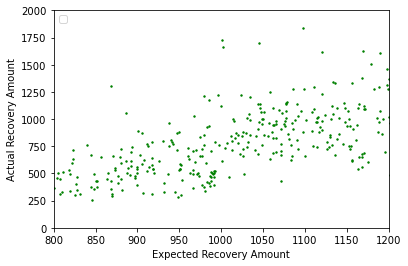

In [50]:
# In order to observe te relationship of Actual Recovery Amount and Expected Recovery Amount more directly, make a scatter plot:
plt.scatter(x=df['expected_recovery_amount'], y=df['actual_recovery_amount'], c="g", s=2)
plt.xlim(800, 1200)
plt.ylim(0, 2000)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.legend(loc=2)

As we did before. We are going to do a statistical test to see if there's a obvious difference between level 0 and level 1 in the average Actual Recovery Amount of money. 

In [53]:
by_recovery_strategy['actual_recovery_amount'].describe().unstack()

# Conduct test
Level_0_actual = thr_800_1200.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = thr_800_1200.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(Level_0_actual,Level_1_actual) 


KruskalResult(statistic=145.18923411651735, pvalue=1.9524946664522674e-33)

The result shows there's a significant difference between level 0 and level 1 in Actual Recovery Amount of money.
In order to verify the relationship is still significant with a smaller sample, repeat same steps with a narrow threshold.

In [55]:
# Repeat for a smaller range of $950 to $1050
thr_950_1050 = df.loc[(df['expected_recovery_amount']<1050) & (df['expected_recovery_amount']>=950)]
Level_0_actual = thr_950_1050.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = thr_950_1050.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(Level_0_actual,Level_1_actual) 

KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)

According to the strong relationship between Expected Recovery Amount and Actual Recovery Amount, we want to know the specific impact of strategy level. We will build a model predicts the Actual Recovery Amount as a function of the Expected Recovery Amount. 

In [70]:
import statsmodels.api as sm

# Define X and y
X = thr_800_1200.loc[:,'expected_recovery_amount']
y = thr_800_1200.loc[:,'actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.353
Model:                                OLS   Adj. R-squared:                  0.351
Method:                     Least Squares   F-statistic:                     173.9
Date:                    Fri, 15 Apr 2022   Prob (F-statistic):           5.38e-32
Time:                            17:07:51   Log-Likelihood:                -2240.5
No. Observations:                     321   AIC:                             4485.
Df Residuals:                         319   BIC:                             4493.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Now, we make a another model.
In this model, we will create an dummy variable that represents whether or not the expected recovery amount was greater than $1000. The corresponding regression coefficient for the variable represents the additional amount of money recovered due to the different recovery strategy.

In [77]:
df['indicator_1000'] = np.where(df['expected_recovery_amount']<1000, 0, 1)
thr_800_1200 = df.loc[(df['expected_recovery_amount']<1200) & (df['expected_recovery_amount']>=800)]

X = thr_800_1200.loc[:,['expected_recovery_amount','indicator_1000']]
y = thr_800_1200.loc[:,'actual_recovery_amount']
X = sm.add_constant(X)
model_2 = sm.OLS(y,X).fit()
print(model_2.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.399
Model:                                OLS   Adj. R-squared:                  0.395
Method:                     Least Squares   F-statistic:                     105.4
Date:                    Fri, 15 Apr 2022   Prob (F-statistic):           7.50e-36
Time:                            17:35:49   Log-Likelihood:                -2228.7
No. Observations:                     321   AIC:                             4463.
Df Residuals:                         318   BIC:                             4475.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Let's do a same model with a narrow threshold.

In [79]:
thr_950_1050 = df.loc[(df['expected_recovery_amount']<1050) & (df['expected_recovery_amount']>=950)]

X = thr_950_1050.loc[:,['expected_recovery_amount','indicator_1000']]
y = thr_950_1050.loc[:,'actual_recovery_amount']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Fri, 15 Apr 2022   Prob (F-statistic):           1.12e-07
Time:                            17:40:40   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

As we can see in the summaries of models with different threshold, the coefficient of Indicator_1000 is above 250 dollars, which exceed the 50 dollars cost a lot.